Import Signal Builder and create an instance of the SignalBuilder class.

In [1]:
from SignalBuilder import SignalBuilder
S = SignalBuilder()

Set the start and end time of the signal. These values can be changed later if desired.

We'll also set a sample frequency, although this can be set later if desired.

In [2]:
start_time = 0
end_time = 10
S.signalStart = start_time
S.signalEnd = end_time

freq = 50
S.sampleFrequency = freq

You can check the structure of the signal thus far using the **report** function

In [3]:
S.report()

Start Node:
    time: 0
----

Piece:
    Type: constant
----

End Node:
    time: 10
----



By default, there are three objects present in out signal chain: two nodes and a piece.
The two nodes are start and end nodes whose order cannot be changed.
SignalBuilder creates pieces between every two nodes in a chain that represent functions which can be
modified at any time. The default function for a piece is a constant.

Let's use Matplotlib to visualize what's going on.

In [4]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inLine

num_samples = (end_time - start_time) * freq
t = np.linspace(start_time, end_time, num=num_samples)
    
def show_signal():
    t, Y, nodes = S.genPiecew()
    plt.plot(t, Y, '-', color='k')
    for xc in nodes:
        plt.axvline(x=xc, linewidth=0.5, linestyle='--', color='m')
    plt.show()

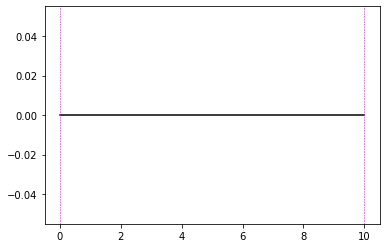

In [5]:
show_signal()

The vertical dotted line represents the location of the nodes present in the signal, which right now are the start and end nodes.

You can start adding in nodes using the **insertNode** method:
```python
insertNode(index, t=None):
```
Where index is the node location in reference to the other nodes, and t is the time value of the node.

In [6]:
S.insertNode(1, 1.5)
S.insertNode(2, 3.5)
S.insertNode(3, 6)
S.insertNode(4, 8)

Looking at the report, our signal now looks like this:

In [7]:
S.report()

Start Node:
    time: 0
----

Piece:
    Type: constant
----

Node:
    time: 1.5
----

Piece:
    Type: constant
----

Node:
    time: 3.5
----

Piece:
    Type: constant
----

Node:
    time: 6
----

Piece:
    Type: constant
----

Node:
    time: 8
----

Piece:
    Type: constant
----

End Node:
    time: 10
----



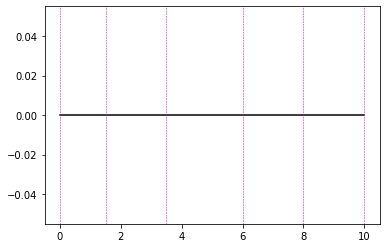

In [8]:
show_signal()

We can now grab those pieces and modify each one as we wish.

In [9]:
pieces = S.pieces
pieces[1].func.setValue(2)
pieces[2].fType = 'square'
pieces[2].func.setAmplitude(0.5)
pieces[2].func.setDutyCycle(0.7)
pieces[3].fType = 'sinusoid'
pieces[3].func.setAmplitude(0.25)
pieces[3].func.setVShift(1)
pieces[4].fType = 'ramp'
pieces[4].getFunc().setTimeRange([8, 10])

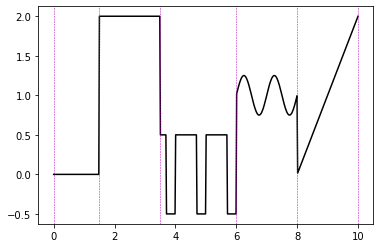

In [10]:
show_signal()

To move a node, use the **setNodeTime** method
```python
setNodeTime(index, t)
```
Where *index* is the node index and *t* is the new time

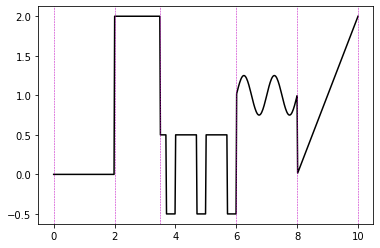

In [11]:
S.setNodeTime(1, 2)
show_signal()

You can also delete nodes using the **deleteNode** method. 
```python
deleteNode(index, right=True)
```
The method will also automatically remove a piece and re-link the chain.

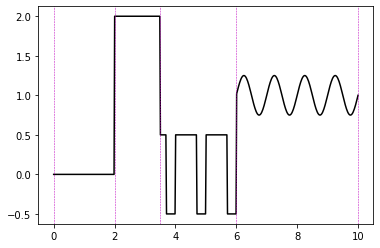

In [12]:
S.deleteNode(4)
show_signal()

By default, the piece to the right of the piece is deleted.

This can be changed by setting the **right** flag to **False**

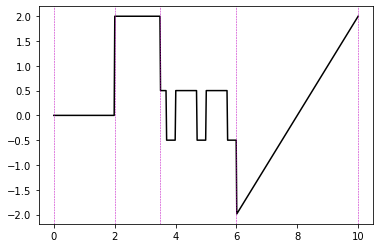

In [13]:
S.deleteNode(4, False)
show_signal()